In [1]:
import os
import pandas as pd
import networkx as nx
import json
import dowhy
import random
import numpy as np
import re
import utils

c:\Users\antonio\anaconda3\envs\causal_ds_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
graph = utils.extract_CD_graph("graph_1603") #Loads the graph from json

In [3]:
graph.edges()

OutEdgeView([('black', 'married'), ('black', 're78'), ('black', 're74'), ('black', 'education'), ('black', 'treatment'), ('hispanic', 'married'), ('hispanic', 'education'), ('hispanic', 're78'), ('hispanic', 're74'), ('age', 'married'), ('age', 'education'), ('age', 're78'), ('age', 're74'), ('age', 'treatment'), ('treatment', 're78'), ('married', 'treatment'), ('education', 'married'), ('education', 'nodegree'), ('education', 're78'), ('education', 're74'), ('education', 'treatment'), ('nodegree', 'married'), ('nodegree', 're78'), ('nodegree', 're74'), ('nodegree', 'treatment'), ('re74', 'treatment')])

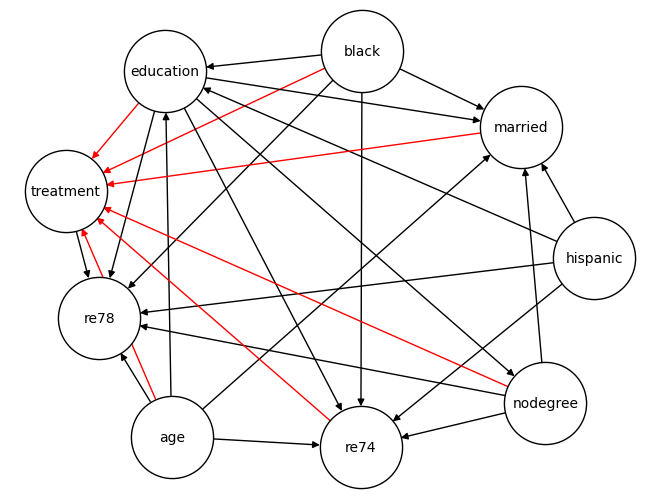

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

col_list = [("black", "treatment"), ("married","treatment"), ("nodegree","treatment"), ("re74","treatment"), ("age","treatment"), ("education","treatment")]

pos = nx.spring_layout(graph, k=100, seed=42) # Seed to make it deterministic
colors = ['red'  if (x,y) in col_list else 'black' for (x,y) in graph.edges()]
nx.draw(graph, with_labels=True, node_size=3500, node_color='w', font_size=10, edgecolors ='black', pos=pos, edge_color=colors)
plt.savefig("./EDA_graphs/augmented_graph.png", dpi=600)
plt.show()

In [2]:
graph = utils.extract_CD_graph("Forced")

graph.remove_edge("married", "treatment")
graph.remove_edge("nodegree", "treatment")
graph.remove_edge("re75", "treatment")

graph = nx.relabel_nodes(graph, {'re75': 're74'})

In [3]:
pos = nx.spring_layout(graph, k=100, seed=42) # Seed to make it deterministic
nx.draw(graph, with_labels=True, node_size=3500, node_color='w', font_size=10, edgecolors ='black', pos=pos)
plt.savefig("./EDA_graphs/domain_knowledge_graph.png", dpi=600)
plt.show()

NameError: name 'colors' is not defined

In [13]:
utils.graph_to_json(graph, "domain_knowledge")

'Graph saved at ./causal_discovery_graphs\\domain_knowledge.json'